In [2]:
# add parent directory to path
import sys
sys.path.append('../')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
import fbpca
import scipy.io
from itertools import count
from functools import partial
import seaborn as sns
import pandas as pd

from cluster import *

sns.set_palette('colorblind')

# Plane dataset

In [4]:
# load in the plane dataset
plane = np.genfromtxt('../datasets/Plane/Plane_combined', delimiter=',')
labels = plane[:,0] - 1 # subtract one because our class labels start at 0 and the dataset's labels start at 1.
data = plane[:,1:]

In [61]:
subkmeansrand = SubKmeansRand(len(set(labels)), preprocessing.scale(data))
subkmeansrand.run()
print('m: {}'.format(subkmeansrand.m))

NMI: 1.0, n_iter: 8
m: 6


/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


### find top 2 most importance features

In [62]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(data,labels)
importances = forest.feature_importances_
top_features = np.argsort(importances)[-1:-3:-1]
top_features

array([143,  97])

### plot in original space

In [63]:
clusters = []
for i in range(len(set(labels))):
    clusters.append(np.vstack(subkmeansrand.assignments[i]))

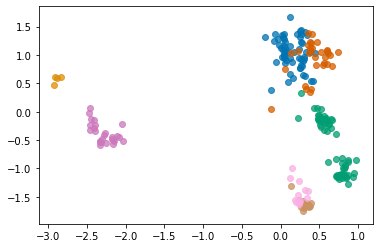

In [64]:
for i in range(len(set(labels))):
    plt.scatter(clusters[i][:,top_features[0]], clusters[i][:,top_features[1]], alpha=0.75)
plt.savefig('../figures/plane_orig.svg', dpi=600, format='svg')

### plot in cluster space

In [65]:
projected_clusters = []
for i in range(len(set(labels))):
    projected_clusters.append((subkmeansrand.transform.T @ clusters[i].T).T)

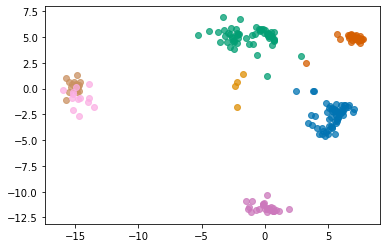

In [66]:
for i in range(len(set(labels))):
    plt.scatter(projected_clusters[i][:,0], projected_clusters[i][:,1], alpha=0.75)
plt.savefig('../figures/plane_cluster.svg', dpi=600, format='svg')

In [54]:
len(set(labels))

7

# Symbols dataset

In [67]:
# load in the dataset
symbols = np.genfromtxt('../datasets/Symbols/Symbols_combined', delimiter=',')
labels = symbols[:,0] - 1 # subtract one because our class labels start at 0 and the dataset's labels start at 1.
data = symbols[:,1:]

In [231]:
subkmeansrand = SubKmeansRand(len(set(labels)), preprocessing.scale(data))
subkmeansrand.run()
print('m: {}'.format(subkmeansrand.m))

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI: 1.0, n_iter: 9
m: 5


### find top 2 most importance features

In [232]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(data,labels)
importances = forest.feature_importances_
top_features = np.argsort(importances)[-1:-3:-1]
top_features

array([391,   5])

### plot in original space

In [233]:
clusters = []
for i in range(len(set(labels))):
    clusters.append(np.vstack(subkmeansrand.assignments[i]))

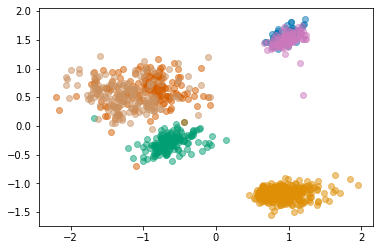

In [234]:
for i in range(len(set(labels))):
    plt.scatter(clusters[i][:,top_features[0]], clusters[i][:,top_features[1]], alpha=0.5)
plt.savefig('../figures/symbols_orig.svg', dpi=600, format='svg')

### plot in cluster space

In [235]:
projected_clusters = []
for i in range(len(set(labels))):
    projected_clusters.append((subkmeansrand.transform.T @ clusters[i].T).T)

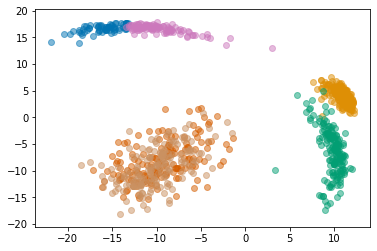

In [236]:
for i in range(len(set(labels))):
    plt.scatter(projected_clusters[i][:,0], projected_clusters[i][:,1], alpha=0.5)
plt.savefig('../figures/symbols_cluster.svg', dpi=600, format='svg')

In [134]:
len(set(labels))

6

# OliveOil dataset

In [237]:
# load in the dataset
oliveoil = np.genfromtxt('../datasets/OliveOil/OliveOil_combined', delimiter=',')
labels = oliveoil[:,0] - 1 # subtract one because our class labels start at 0 and the dataset's labels start at 1.
data = oliveoil[:,1:]

In [293]:
subkmeansrand = SubKmeansRand(len(set(labels)), preprocessing.scale(data))
subkmeansrand.run()
print('m: {}'.format(subkmeansrand.m))

NMI: 1.0, n_iter: 5
m: 3


/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


### find top 2 most importance features

In [294]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(data,labels)
importances = forest.feature_importances_
top_features = np.argsort(importances)[-1:-3:-1]
top_features

array([330, 335])

### plot in original space

In [295]:
clusters = []
for i in range(len(set(labels))):
    clusters.append(np.vstack(subkmeansrand.assignments[i]))

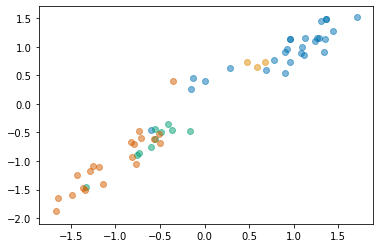

In [296]:
for i in range(len(set(labels))):
    plt.scatter(clusters[i][:,top_features[0]], clusters[i][:,top_features[1]], alpha=0.5)
plt.savefig('../figures/oliveoil_orig.svg', dpi=600, format='svg')

### plot in cluster space

In [297]:
projected_clusters = []
for i in range(len(set(labels))):
    projected_clusters.append((subkmeansrand.transform.T @ clusters[i].T).T)

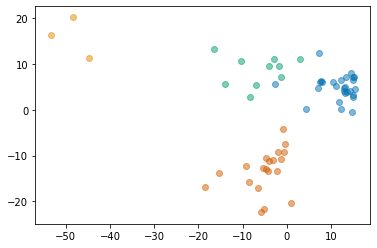

In [298]:
for i in range(len(set(labels))):
    plt.scatter(projected_clusters[i][:,0], projected_clusters[i][:,1], alpha=0.5)
plt.savefig('../figures/oliveoil_cluster.svg', dpi=600, format='svg')

In [250]:
len(set(labels))

4

# StarLightCurves dataset

In [299]:
# load in the dataset
starlight = np.genfromtxt('../datasets/StarLightCurves/StarLightCurves_combined', delimiter=',')
labels = starlight[:,0] - 1 # subtract one because our class labels start at 0 and the dataset's labels start at 1.
data = starlight[:,1:]

In [300]:
subkmeansrand = SubKmeansRand(len(set(labels)), preprocessing.scale(data))
subkmeansrand.run()
print('m: {}'.format(subkmeansrand.m))

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI: 1.0, n_iter: 10
m: 2


### find top 2 most importance features

In [301]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(data,labels)
importances = forest.feature_importances_
top_features = np.argsort(importances)[-1:-3:-1]
top_features

array([139, 129])

### plot in original space

In [302]:
clusters = []
for i in range(len(set(labels))):
    clusters.append(np.vstack(subkmeansrand.assignments[i]))

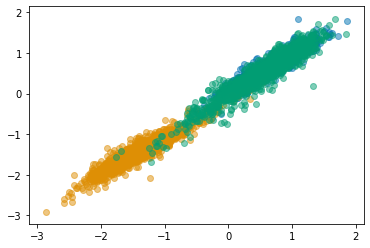

In [303]:
for i in range(len(set(labels))):
    plt.scatter(clusters[i][:,top_features[0]], clusters[i][:,top_features[1]], alpha=0.5)
plt.savefig('../figures/starlight_orig.svg', dpi=600, format='svg')

### plot in cluster space

In [304]:
projected_clusters = []
for i in range(len(set(labels))):
    projected_clusters.append((subkmeansrand.transform.T @ clusters[i].T).T)

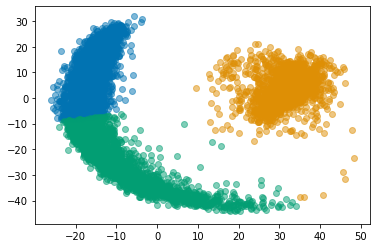

In [305]:
for i in range(len(set(labels))):
    plt.scatter(projected_clusters[i][:,0], projected_clusters[i][:,1], alpha=0.5)
plt.savefig('../figures/starlight_cluster.svg', dpi=600, format='svg')

# DrivFace dataset

In [31]:
matfile = scipy.io.loadmat('../datasets/DrivFace/DrivFace.mat') # load in matlab data file
drivFace = matfile['drivFaceD'][0,0] # grab the struct
data = drivFace['data']
labels = drivFace['nlab'][:,0]

In [32]:
subkmeansrand = SubKmeansRand(len(set(labels)), preprocessing.scale(data))
subkmeansrand.run()
print('m: {}'.format(subkmeansrand.m))

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI: 1.0, n_iter: 9
m: 2


### find top 2 most importance features

In [33]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(data,labels)
importances = forest.feature_importances_
top_features = np.argsort(importances)[-1:-3:-1]
top_features

array([16, 97])

### plot in original space

In [34]:
clusters = []
for i in range(len(set(labels))):
    clusters.append(np.vstack(subkmeansrand.assignments[i]))

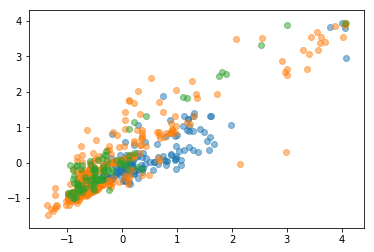

In [35]:
for i in range(len(set(labels))):
    plt.scatter(clusters[i][:,top_features[0]], clusters[i][:,top_features[1]], alpha=0.5)
plt.savefig('../figures/drivface_orig.svg', dpi=600, format='svg')

### plot in cluster space

In [36]:
projected_clusters = []
for i in range(len(set(labels))):
    projected_clusters.append((subkmeansrand.transform.T @ clusters[i].T).T)

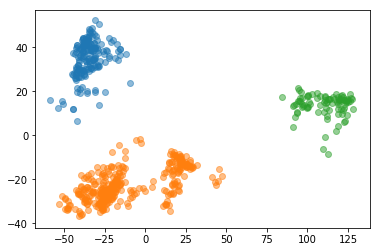

In [37]:
for i in range(len(set(labels))):
    plt.scatter(projected_clusters[i][:,0], projected_clusters[i][:,1], alpha=0.5)
plt.savefig('../figures/driveface_cluster.svg', dpi=600, format='svg')

# RNASeq dataset

In [279]:
data = np.genfromtxt('../datasets/TCGA-PANCAN-HiSeq-801x20531/data.csv', delimiter=',', skip_header=True)
data = data[:,1:] # get rid of sample_# column
labels = np.genfromtxt('../datasets/TCGA-PANCAN-HiSeq-801x20531/labels.csv', delimiter=',', skip_header=True, dtype=str)
labels = labels[:,1] # rid of smaple_# column
# convert label strings into numbers (https://stackoverflow.com/questions/17152468/python-enumerate-a-list-of-string-keys-into-ints)
label_to_num = defaultdict(partial(next, count(0)))
labels = np.array([label_to_num[label] for label in labels])

In [280]:
subkmeansrand = SubKmeansRand(len(set(labels)), preprocessing.scale(data))
subkmeansrand.run()
print('m: {}'.format(subkmeansrand.m))

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI: 1.0, n_iter: 18
m: 4


### find top 2 most importance features

In [281]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(data,labels)
importances = forest.feature_importances_
top_features = np.argsort(importances)[-1:-3:-1]
top_features

array([13818,  7964])

### plot in original space

In [282]:
clusters = []
for i in range(len(set(labels))):
    clusters.append(np.vstack(subkmeansrand.assignments[i]))

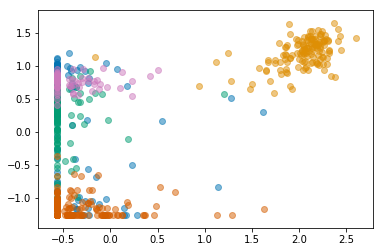

In [283]:
for i in range(len(set(labels))):
    plt.scatter(clusters[i][:,top_features[0]], clusters[i][:,top_features[1]], alpha=0.5)
plt.savefig('../figures/rna_orig.svg', dpi=600, format='svg')

### plot in cluster space

In [284]:
projected_clusters = []
for i in range(len(set(labels))):
    projected_clusters.append((subkmeansrand.transform.T @ clusters[i].T).T)

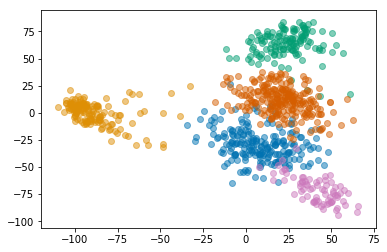

In [285]:
for i in range(len(set(labels))):
    plt.scatter(projected_clusters[i][:,0], projected_clusters[i][:,1], alpha=0.5)
plt.savefig('../figures/rna_cluster.svg', dpi=600, format='svg')

# Runtime plots

## vs number of features

In [251]:
df_pca = pd.read_csv('../Results/dim_results/dim_results_PcaKmeans_03_57_43.csv')
df_lda = pd.read_csv('../Results/dim_results/dim_results_LdaKmeans_08_43_43.csv')
df_sub = pd.read_csv('../Results/dim_results/dim_results_SubKmeans_03_53_08.csv')
df_rand = pd.read_csv('../Results/dim_results/dim_results_SubKmeansRand_01_34_30.csv')

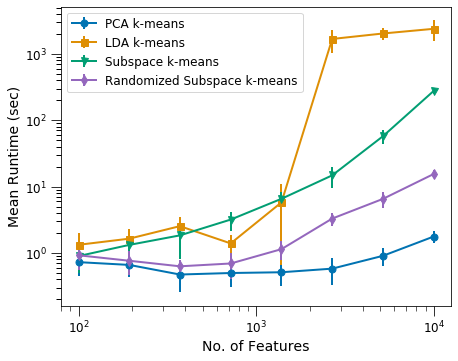

In [252]:
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
matplotlib.rc('xtick.major', size=10)
matplotlib.rc('xtick.minor', size=5)
matplotlib.rc('ytick.major', size=10)
matplotlib.rc('ytick.minor', size=5)
cmap = matplotlib.cm.get_cmap('tab10')
plt.figure(1, figsize=(7,5.5))
plt.errorbar(df_pca['dim_size'], df_pca['mean_runtime'], yerr=df_pca['StDev'], linewidth=2, label='PCA k-means', marker='o', ms=7)
plt.errorbar(df_lda['dim_size'], df_lda['mean_runtime'], yerr=df_lda['StDev'], linewidth=2, label='LDA k-means', marker='s', ms=7)
plt.errorbar(df_sub['dim_size'], df_sub['mean_runtime'], yerr=df_sub['StDev'], linewidth=2, label='Subspace k-means', marker='v', ms=7)
plt.errorbar(df_rand['dim_size'], df_rand['mean_runtime'], yerr=df_rand['StDev'], linewidth=2, color=cmap(4), label='Randomized Subspace k-means', marker='d', ms=7)
plt.xlabel('No. of Features', fontsize=14)
plt.ylabel('Mean Runtime (sec)', fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=12)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/runtime_v_dim.svg', format='svg')

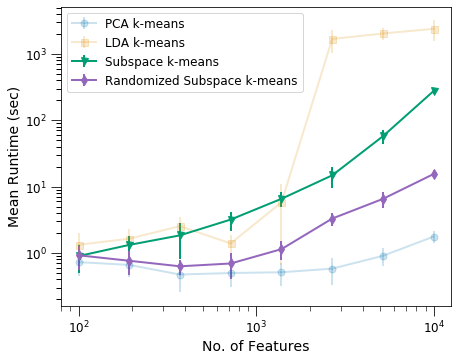

In [253]:
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
matplotlib.rc('xtick.major', size=10)
matplotlib.rc('xtick.minor', size=5)
matplotlib.rc('ytick.major', size=10)
matplotlib.rc('ytick.minor', size=5)
cmap = matplotlib.cm.get_cmap('tab10')
plt.figure(1, figsize=(7,5.5))
plt.errorbar(df_pca['dim_size'], df_pca['mean_runtime'], yerr=df_pca['StDev'], linewidth=2, label='PCA k-means', marker='o', ms=7, alpha=0.2)
plt.errorbar(df_lda['dim_size'], df_lda['mean_runtime'], yerr=df_lda['StDev'], linewidth=2, label='LDA k-means', marker='s', ms=7, alpha=0.2)
plt.errorbar(df_sub['dim_size'], df_sub['mean_runtime'], yerr=df_sub['StDev'], linewidth=2, label='Subspace k-means', marker='v', ms=7)
plt.errorbar(df_rand['dim_size'], df_rand['mean_runtime'], yerr=df_rand['StDev'], linewidth=2, color=cmap(4), label='Randomized Subspace k-means', marker='d', ms=7)
plt.xlabel('No. of Features', fontsize=14)
plt.ylabel('Mean Runtime (sec)', fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=12)
#plt.grid(axis='y')
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/runtime_v_dim2.svg', format='svg')

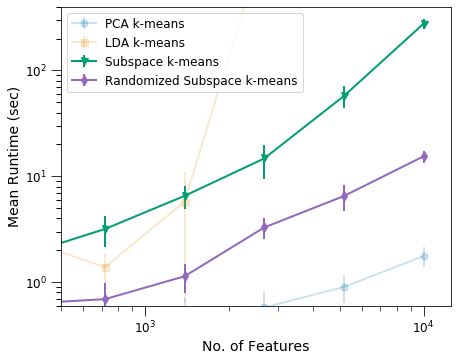

In [254]:
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
matplotlib.rc('xtick.major', size=10)
matplotlib.rc('xtick.minor', size=5)
matplotlib.rc('ytick.major', size=10)
matplotlib.rc('ytick.minor', size=5)
cmap = matplotlib.cm.get_cmap('tab10')
plt.figure(1, figsize=(7,5.5))
plt.errorbar(df_pca['dim_size'], df_pca['mean_runtime'], yerr=df_pca['StDev'], linewidth=2, label='PCA k-means', marker='o', ms=7, alpha=0.2)
plt.errorbar(df_lda['dim_size'], df_lda['mean_runtime'], yerr=df_lda['StDev'], linewidth=2, label='LDA k-means', marker='s', ms=7, alpha=0.2)
plt.errorbar(df_sub['dim_size'], df_sub['mean_runtime'], yerr=df_sub['StDev'], linewidth=2, label='Subspace k-means', marker='v', ms=7)
plt.errorbar(df_rand['dim_size'], df_rand['mean_runtime'], yerr=df_rand['StDev'], linewidth=2, color=cmap(4), label='Randomized Subspace k-means', marker='d', ms=7)
plt.xlabel('No. of Features', fontsize=14)
plt.ylabel('Mean Runtime (sec)', fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=12)
plt.ylim((0.6, 4e2))
plt.xlim((5e2))
#plt.grid(axis='y')
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/runtime_v_dim3.svg', format='svg')

## vs number of instances

In [255]:
df_pca = pd.read_csv('../Results/runtime_results/runtime_results_PcaKmeans_21_06_21.csv')
df_lda = pd.read_csv('../Results/runtime_results/runtime_results_LdaKmeans_02_22_48.csv')
df_sub = pd.read_csv('../Results/runtime_results/runtime_results_SubKmeans_18_46_20.csv')
df_rand = pd.read_csv('../Results/runtime_results/runtime_results_SubKmeansRand_16_47_21.csv')

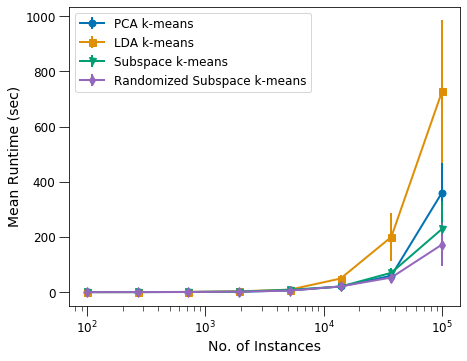

In [256]:
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
matplotlib.rc('xtick.major', size=10)
matplotlib.rc('xtick.minor', size=5)
matplotlib.rc('ytick.major', size=10)
matplotlib.rc('ytick.minor', size=5)
cmap = matplotlib.cm.get_cmap('tab10')
plt.figure(1, figsize=(7,5.5))
plt.errorbar(df_pca['sample_size'], df_pca['mean_runtime'], yerr=df_pca['StDev'], linewidth=2, label='PCA k-means', marker='o', ms=7)
plt.errorbar(df_lda['sample_size'], df_lda['mean_runtime'], yerr=df_lda['StDev'], linewidth=2, label='LDA k-means', marker='s', ms=7)
plt.errorbar(df_sub['sample_size'], df_sub['mean_runtime'], yerr=df_sub['StDev'], linewidth=2, label='Subspace k-means', marker='v', ms=7)
plt.errorbar(df_rand['sample_size'], df_rand['mean_runtime'], yerr=df_rand['StDev'], linewidth=2, color=cmap(4), label='Randomized Subspace k-means', marker='d', ms=7)
plt.xlabel('No. of Instances', fontsize=14)
plt.ylabel('Mean Runtime (sec)', fontsize=14)
plt.yscale('linear')
plt.xscale('log')
plt.legend(loc='upper left', fontsize=12)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/runtime_v_size.svg', format='svg')

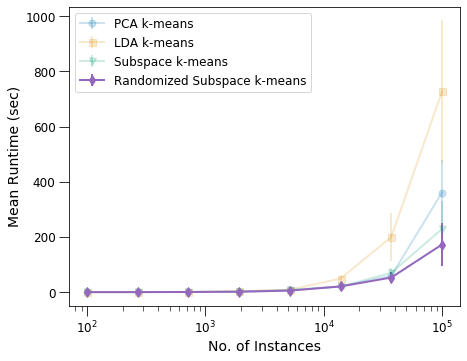

In [257]:
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
matplotlib.rc('xtick.major', size=10)
matplotlib.rc('xtick.minor', size=5)
matplotlib.rc('ytick.major', size=10)
matplotlib.rc('ytick.minor', size=5)
cmap = matplotlib.cm.get_cmap('tab10')
plt.figure(1, figsize=(7,5.5))
plt.errorbar(df_pca['sample_size'], df_pca['mean_runtime'], yerr=df_pca['StDev'], linewidth=2, label='PCA k-means', marker='o', ms=7, alpha=0.2)
plt.errorbar(df_lda['sample_size'], df_lda['mean_runtime'], yerr=df_lda['StDev'], linewidth=2, label='LDA k-means', marker='s', ms=7, alpha=0.2)
plt.errorbar(df_sub['sample_size'], df_sub['mean_runtime'], yerr=df_sub['StDev'], linewidth=2, label='Subspace k-means', marker='v', ms=7, alpha=0.2)
plt.errorbar(df_rand['sample_size'], df_rand['mean_runtime'], yerr=df_rand['StDev'], linewidth=2, color=cmap(4), label='Randomized Subspace k-means', marker='d', ms=7)
plt.xlabel('No. of Instances', fontsize=14)
plt.ylabel('Mean Runtime (sec)', fontsize=14)
plt.yscale('linear')
plt.xscale('log')
plt.legend(loc='upper left', fontsize=12)
#plt.xlim((1e4, 1.1e5))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/runtime_v_size2.svg', format='svg')

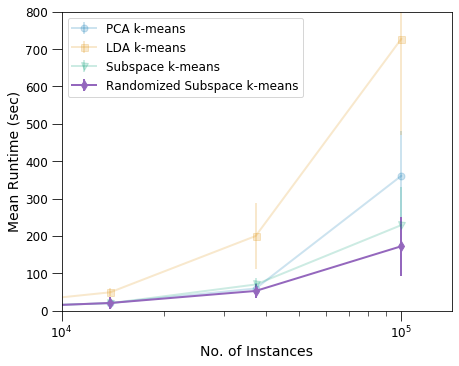

In [258]:
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
matplotlib.rc('xtick.major', size=10)
matplotlib.rc('xtick.minor', size=5)
matplotlib.rc('ytick.major', size=10)
matplotlib.rc('ytick.minor', size=5)
cmap = matplotlib.cm.get_cmap('tab10')
plt.figure(1, figsize=(7,5.5))
plt.errorbar(df_pca['sample_size'], df_pca['mean_runtime'], yerr=df_pca['StDev'], linewidth=2, label='PCA k-means', marker='o', ms=7, alpha=0.2)
plt.errorbar(df_lda['sample_size'], df_lda['mean_runtime'], yerr=df_lda['StDev'], linewidth=2, label='LDA k-means', marker='s', ms=7, alpha=0.2)
plt.errorbar(df_sub['sample_size'], df_sub['mean_runtime'], yerr=df_sub['StDev'], linewidth=2, label='Subspace k-means', marker='v', ms=7, alpha=0.2)
plt.errorbar(df_rand['sample_size'], df_rand['mean_runtime'], yerr=df_rand['StDev'], linewidth=2, color=cmap(4), label='Randomized Subspace k-means', marker='d', ms=7)
plt.xlabel('No. of Instances', fontsize=14)
plt.ylabel('Mean Runtime (sec)', fontsize=14)
plt.yscale('linear')
plt.xscale('log')
plt.legend(loc='upper left', fontsize=12)
plt.xlim((1e4))
plt.ylim((0,800))
#plt.grid(axis='y')
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/runtime_v_size3.svg', format='svg')

## real data sets

In [259]:
pcakmeans = {'mean_runtime': [0.04, 0.6, 0.03, 4.34, 1.04, 2.703], 'stdev': [0.04, 0.25, 0.02, 0.57, 0.43, 0.63]}
ldakmeans = {'mean_runtime': [0.05, 6.3, 0.15, 125.29, 230.98, 2301.286], 'stdev': [0.03, 1.69, 0.05, 20.21, 122.76, 201.22]}
subkmeans = {'mean_runtime': [0.26, 3.85, 2.39, 19.31, 404.28, 1730.618], 'stdev': [0.15, 1.37, 1.58, 5.65, 319.67, 100.47]}
randkmeans = {'mean_runtime': [0.22,  0.79, 0.19, 8.65, 14.55, 367.838], 'stdev': [0.12, 0.37, 0.08, 2.03, 3.21, 10.21]}
datasets = ['Plane' , 'Symbols', 'OliveOil', 'StarLightCurves', 'DrivFace', 'RNA-Seq']

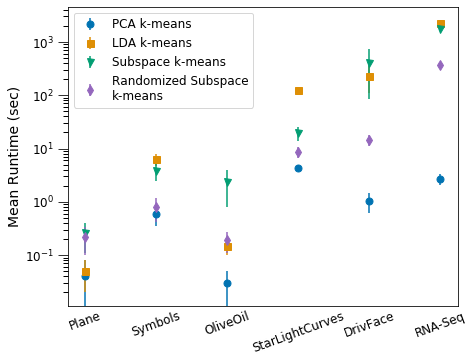

In [260]:
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
matplotlib.rc('xtick.major', size=0)
matplotlib.rc('ytick.major', size=10)
matplotlib.rc('ytick.minor', size=5)
cmap = matplotlib.cm.get_cmap('tab10')
plt.figure(1, figsize=(7,5.5))
plt.errorbar(np.arange(len(datasets)), pcakmeans['mean_runtime'], yerr=pcakmeans['stdev'], label='PCA k-means', fmt='o', ms=7)
plt.errorbar(np.arange(len(datasets)), ldakmeans['mean_runtime'], yerr=ldakmeans['stdev'], label='LDA k-means',fmt='s', ms=7)
plt.errorbar(np.arange(len(datasets)), subkmeans['mean_runtime'], yerr=subkmeans['stdev'], label='Subspace k-means', fmt='v', ms=7)
plt.errorbar(np.arange(len(datasets)), randkmeans['mean_runtime'], yerr=randkmeans['stdev'], color=cmap(4), label='Randomized Subspace\nk-means', fmt='d', ms=7)
plt.ylabel('Mean Runtime (sec)', fontsize=14)
plt.yscale('log')
plt.xscale('linear')
# plt.grid(axis='y', which='both')
plt.xticks(np.arange(len(datasets)), datasets, rotation=20)
plt.legend(loc='upper left', fontsize=12)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/runtime_datasets.svg', format='svg')